# Introduction to Regression Splines

https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

## Introduction

The first algorithm we get introduced is Linear Regression. There are advantages advantages and limitations of it. It assumes a linear relationship between the dependent and independent variables, which is rarely the case in reality. As an improvement over this model, we have Polynomial Regression which generated better results (most of the time). But using Polynomial Regression on datasets with high variability leads to higher chances over-fitting.With Polynomial Regression the model always becomes too flexible, which does not work well with unseen data. There is another non-linear approach known as **Regression Splines**. It uses a combination of linear/polynomial functions to fit the data.

## Understanding the data

To understand the concepts, we will work on the wage prediction dataset which we can download [here](https://drive.google.com/file/d/1QIHCTvHQIBpilzbNxGmbdEBEbmEkMd_K/view) (this has been taken from the popular book: [Introduction to Statistical learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)).

Our dataset contains information like the ID, year, age, sex, marital status, race, education, region, job class, health, health insurance, log of wage and wage of various employees. **In order to focus on spline regression in detail, we will use only `'age'` as the independent variable to predict the `'wage'` (dependent variable)**.

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

import statsmodels.api as sm

D:\Work\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
rnd_seed=42
np.random.seed(rnd_seed)

In [5]:
# read data_set
data = pd.read_csv("data/wage.csv")

In [6]:
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [7]:
X = data['age']
y = data['wage']

In [8]:
# Dividing data into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=rnd_seed)

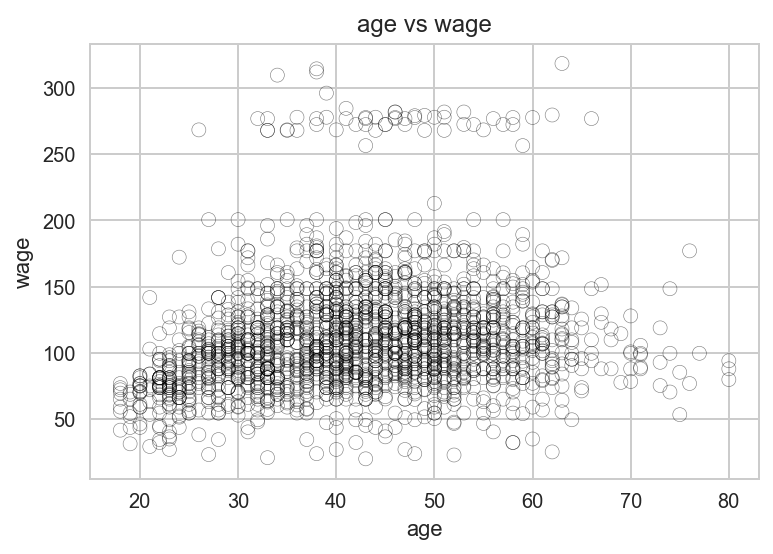

In [9]:
# Visualize the relationship b/w age and wage
plt.scatter(X_train, y_train, facecolor='None', edgecolor='k', alpha=0.5)
plt.xlabel('age')
plt.ylabel('wage')
plt.title('age vs wage');

## Introduction to Linear Regression

Linear regression is the simplest and most widely used statistical technique for predictive modelling. It is a supervised learning algorithm for solving regression based tasks.

It is called a linear model as it establishes a linear relationship between the dependent and independent variables. It basically gives us a linear equation like the one below where we have our features as independent variables with coefficients:

\begin{align}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \dots + \beta_pX_p
\end{align}

Here, we have Y as our dependent variable, the X’s are the independent variables and all betas are the coefficients. Coefficients are the weights assigned to the features. They signify the importance of each of the features. For example, if the outcome of an equation is highly dependent upon one feature (X1) as compared to any other feature, it means the coefficient/weight of the feature (X1) would have a higher magnitude as compared to any other feature.

So, let's try to understand linear regression with only one feature, i.e., only one independent variable. It is called Simple Linear Regression. Therefore, our equation becomes:

\begin{align}
Y = \beta_0 + \beta_1X_1
\end{align}

As we are using only `age` to predict the `wages` of the employees, we will implement simple linear regression on the training dataset and calculate the error (RMSE) on the validation dataset.

In [10]:
# Fitting linear regression model
model = LinearRegression()

In [11]:
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print( model.intercept_, model.coef_)

82.5887485655 [ 0.68334323]


In [13]:
# Prediction on validation dataset
pred = model.predict(X_valid.values.reshape(-1, 1))

In [14]:
# Visualisation
# We will use 70 points between minimum and maximum values of valid_x for plotting
xp = np.linspace(X_valid.min(), X_valid.max(), 70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

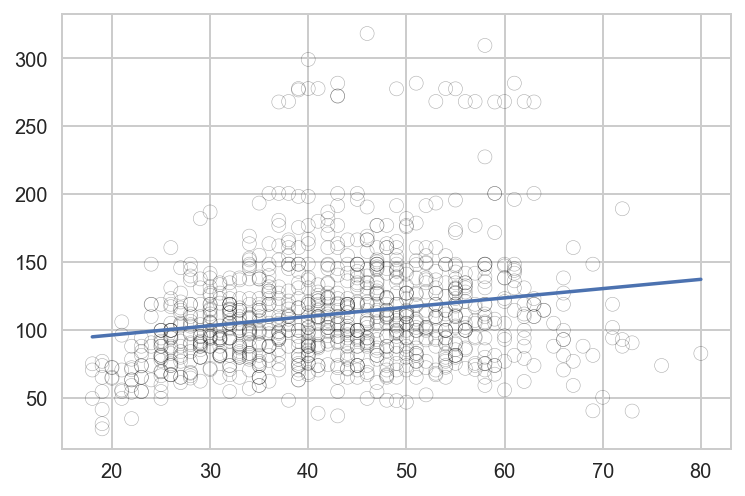

In [15]:
plt.scatter(X_valid, y_valid, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot);

We can now calculate the RMSE on the predictions.

In [16]:
RMSE = sqrt(mean_squared_error(y_valid, pred))
print(RMSE)

40.18125811176432


We can infer from the above graph that linear regression is not capturing all the signals available and is not the best method for solving this wage prediction.

Although linear models are relatively simple to describe and implement and have advantages over other approaches in terms of interpretation and inference, they **have significant limitations in terms of predictive power**. This is because they assume the linear combination between the dependent and independent variables which is almost always an approximation, and sometimes a poor one.

In the other methods we will see below, we will set aside the linearity assumption while still attempting to maintain as much interpretability as possible. We will do this by examining very simple extensions of linear models like polynomial regression and step functions, as well as more sophisticated approaches such as splines.

## Improvement over Linear Regression: Polynomial Regression

Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables $X^1, X^2$ and $X^3$, as predictors. This approach provides a simple way to provide a non-linear fit to data.

**The standard method to extend linear regression to a non-linear relationship between the dependent and independent variables, has been to replace the linear model with a polynomial function.**

\begin{align}
Y = \beta_0 + \beta_iX_i + \beta_2X{_i}{^2} + \beta_3X{_i}{^3} + \dots + \beta_pX_{i}{^p}
\end{align}

As we increase the power value, the curve obtained contains high oscillations which will lead to shapes that are over-flexible. **Such curves lead to over-fitting.**

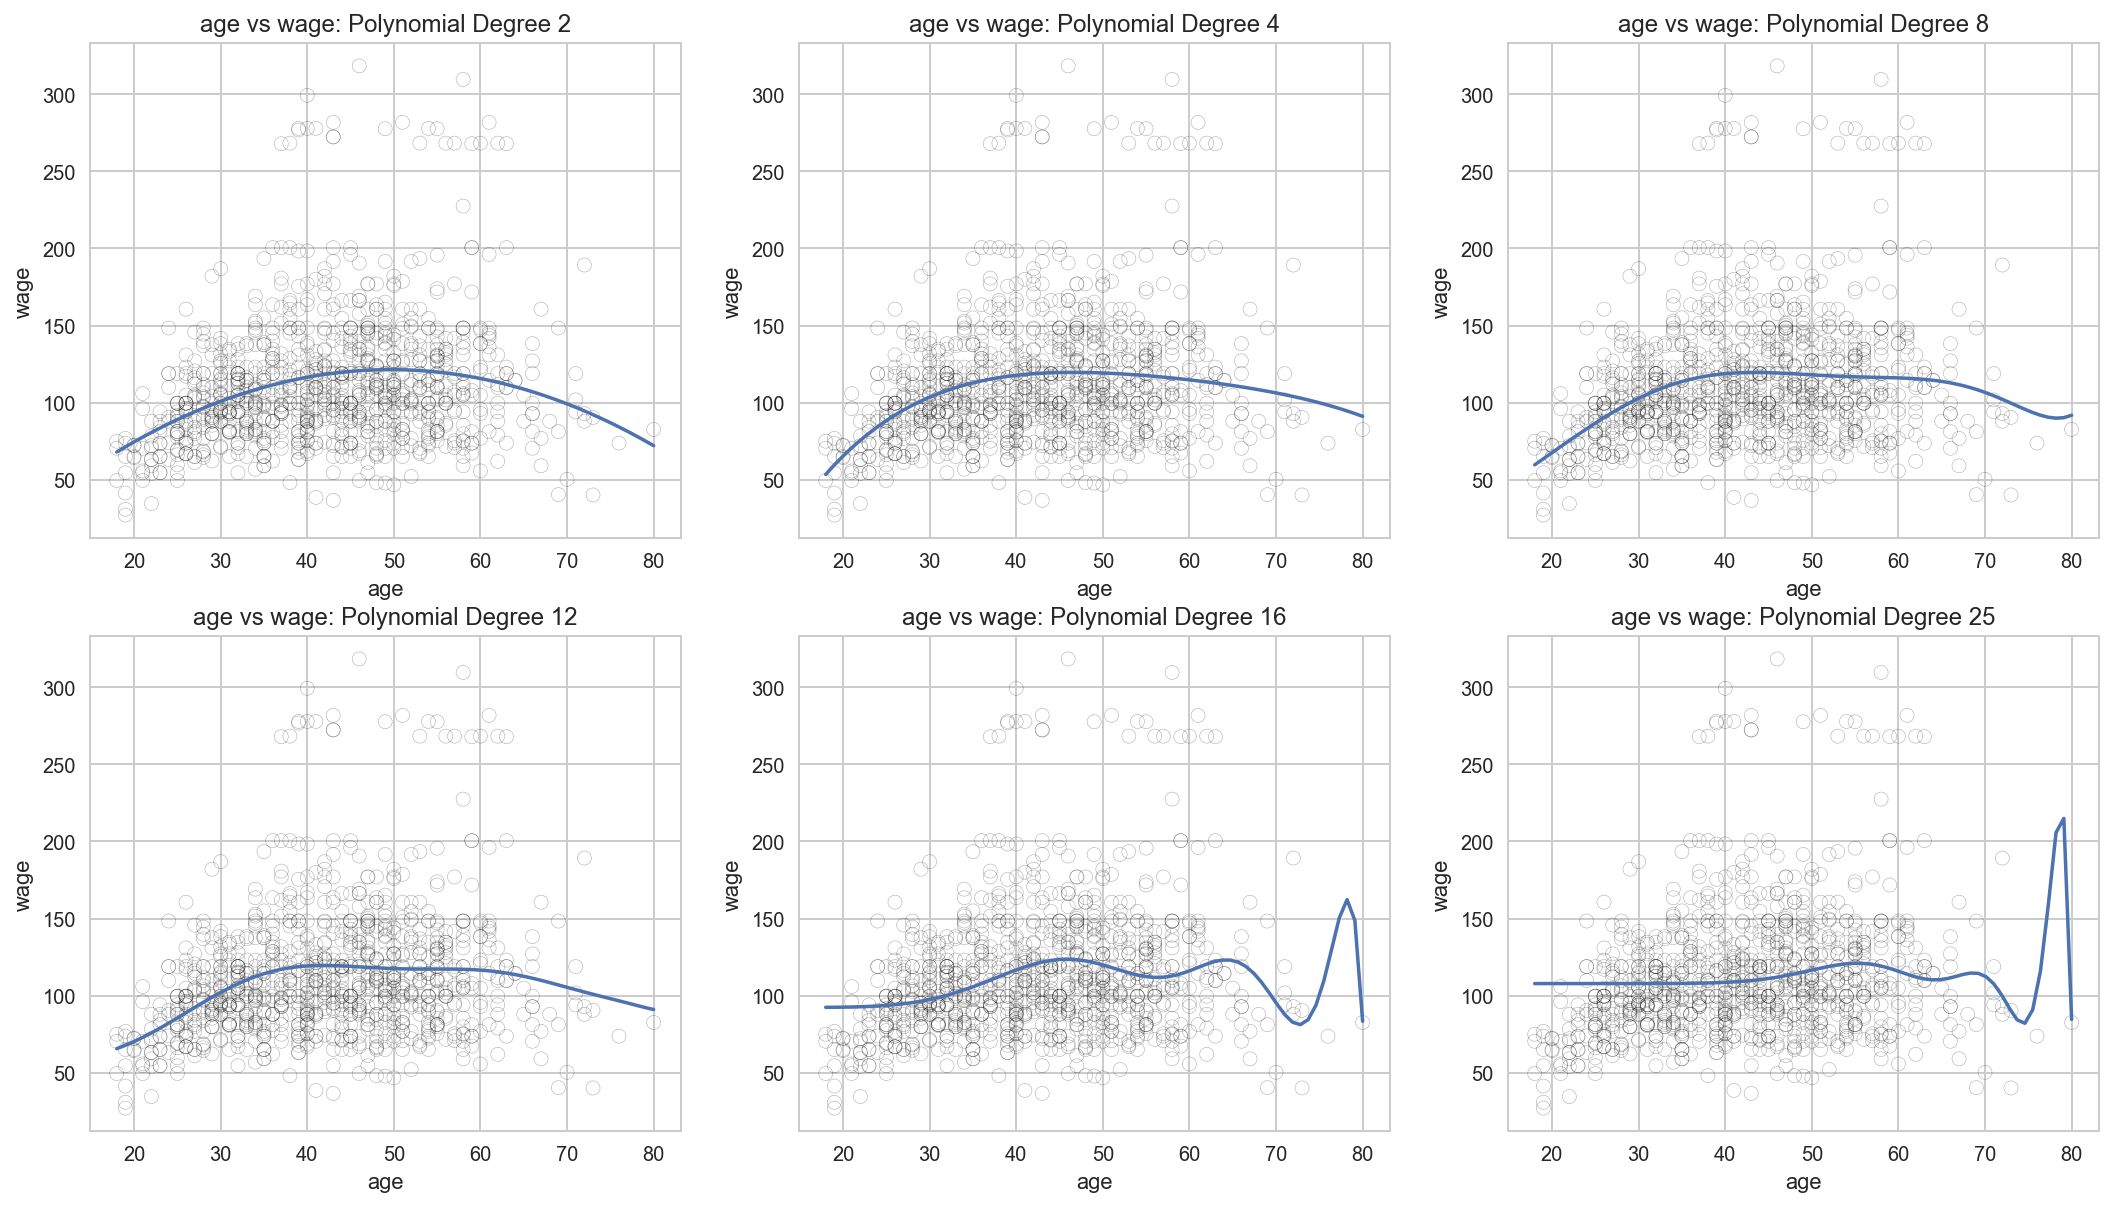

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, d in enumerate([2, 4, 8, 12, 16, 25]):
    
    # train a linear regression
    model = LinearRegression()
    
    # fit the linear regression model on the training set
    _= model.fit(PolynomialFeatures(degree=d).fit_transform(X_train.values.reshape(-1, 1)), y_train)
    
    # We will use 70 points between minimum and maximum values of valid_x for plotting
    xp = np.linspace(X_valid.min(), X_valid.max(), 70)
    xp = xp.reshape(-1, 1)
    pred_plot = model.predict(PolynomialFeatures(degree=d).fit_transform(xp))
    
    _= axes[i].scatter(X_valid, y_valid, facecolor='None', edgecolor='k', alpha=0.3)
    _= axes[i].plot(xp, pred_plot)
    _= axes[i].set(xlabel='age', ylabel='wage', title='age vs wage: Polynomial Degree {0}'.format(d))

Unfortunately, polynomial regression has a fair number of issues as well. As we increase the complexity of the formula, the number of features also increases which is sometimes difficult to handle. Also, polynomial regression has a tendency to drastically over-fit, even on this simple one dimensional data set.

There are other issues with polynomial regression. For example, it is inherently non-local, i.e., changing the value of Y at one point in the training set can affect the fit of the polynomial for data points that are very far away. Hence, to avoid the use of high degree polynomial on the whole dataset, we can substitute it with many different small degree polynomial functions.

## Walk-through of Regression Splines along with its Implementations

In order to overcome the disadvantages of polynomial regression, we can use an improved regression technique which, instead of building one model for the entire dataset, divides the dataset into multiple bins and fits each bin with a separate model. **Such a technique is known as Regression spline**.

Regression splines is one of the most important non linear regression techniques. In polynomial regression, we generated new features by using various **polynomial functions on the existing features** which imposed a global structure on the dataset. To overcome this, we can divide the distribution of the data into separate portions and fit linear or low degree polynomial functions on each of these portions.

![](assets/spline_example.png)

Image Source: R-Bloggers

**The points where the division occurs are called Knots**. Functions which we can use for modelling each piece/bin are known as Piecewise functions. There are various piecewise functions that we can use to fit these individual bins.

In the next few sub-sections, we will read about some of these piecewise functions.

### Piecewise Step Functions

One of the most common piecewise functions is a Step function. Step function is a function which remains constant within the interval. We can fit individual step functions to each of the divided portions in order to avoid imposing a global structure. Here we break the range of X into bins, and fit a different constant in each bin.

In greater detail, we create cut points C1 , C2, . . . , Ck  in the range of X, and then construct K  + 1 new variables

\begin{align}
C_0(X) = I(X \lt c_1), \\
C_1(X) = I(c_1 \le X \lt c_2), \\
C_2(X) = I(c_2 \le X \lt c_3), \\
\vdots \\
C_{K-1}(X) = I(c_{K-1} \le X \lt c_K), \\
C_K(X) = I(c_K \le X)
\end{align}

where $I( )$ is an indicator function that returns a $1$ if the condition is true and returns a $0$ otherwise. For example, $I(c_K  \le X )$ equals $1$ if $c_K \le X$, otherwise it equals $0$. For a given value of $X$, at most only one of $C_1, C_2, \dots , C_K$  can be non-zero, as $X$ can only lie in any one of the bins.

In [18]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(X_train, 4, retbins=True, right=True)
df_cut.value_counts()

(33.5, 49.0]      939
(49.0, 64.5]      524
(17.938, 33.5]    503
(64.5, 80.0]       44
Name: age, dtype: int64

In [19]:
df_cut.shape, X_train.shape, y_train.shape

((2010,), (2010,), (2010,))

In [20]:
X_train.shape, y_train.shape, pd.Series(df_cut).shape

((2010,), (2010,), (2010,))

In [21]:
df_steps = pd.concat([X_train, df_cut, y_train], keys=['age','age_cuts','wage'], axis=1)

In [22]:
df_steps.shape

(2010, 3)

In [23]:
df_steps.head(10)

,age,age_cuts,wage
2761,41,"(33.5, 49.0]",65.110854
123,59,"(49.0, 64.5]",139.213788
1808,41,"(33.5, 49.0]",73.775743
2286,46,"(33.5, 49.0]",281.745971
2147,60,"(49.0, 64.5]",106.921814
618,31,"(17.938, 33.5]",109.833986
406,37,"(33.5, 49.0]",127.115744
1157,43,"(33.5, 49.0]",81.283253
1068,46,"(33.5, 49.0]",117.146817
1133,53,"(49.0, 64.5]",107.903924


In [24]:
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)

In [25]:
df_steps_dummies.head(5)

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
2761,0,1,0,0
123,0,0,1,0
1808,0,1,0,0
2286,0,1,0,0
2147,0,0,1,0


In [26]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80']

In [27]:
df_steps.wage.shape, df_steps_dummies.shape

((2010,), (2010, 4))

In [28]:
# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage.values, df_steps_dummies.values).fit()

In [29]:
# Binning validation set into same 4 bins
bin_mapping = np.digitize(X_valid, bins) 
dF_steps_valid_dummies = pd.get_dummies(bin_mapping)

In [30]:
# Removing any outliers
dF_steps_valid_dummies = pd.get_dummies(bin_mapping).drop([5], axis=1)

In [31]:
# Prediction
pred2 = fit3.predict(dF_steps_valid_dummies)

In [32]:
# Calculating RMSE
RMSE = sqrt(mean_squared_error(y_valid, pred2)) 
print(RMSE) 

39.77088127033501


In [33]:
# We will plot the graph for 70 observations only
xp = np.linspace(X_valid.min(), X_valid.max()-1, 70)
bin_mapping = np.digitize(xp, bins) 
X_valid_2  = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2 )

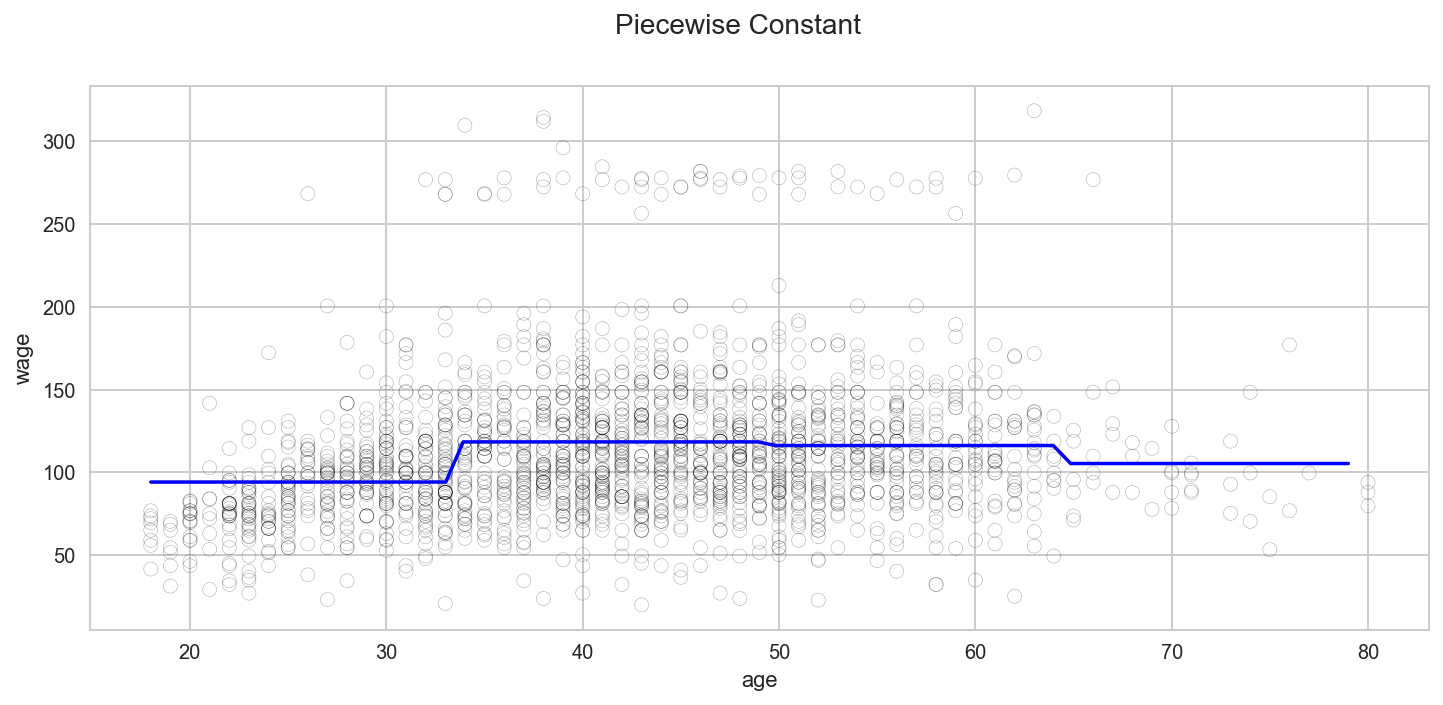

In [34]:
# Visualisation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
_= ax.scatter(X_train, y_train, facecolor='None', edgecolor='k', alpha=0.3)
_= ax.plot(xp, pred2, c='b')

_= ax.set_xlabel('age')
_= ax.set_ylabel('wage');

Binning has its obvious conceptual issues. Most prominently, we expect most phenomena we study to vary continuously with inputs. **Binned regression does not create continuous functions of the predictor, so in most cases we would expect no relationship between the input and output**.

For example, in the above graph, we can see that the first bin clearly misses the increasing trend of wage with age.

### Basis Functions

To capture non-linearity in regression models, we need to transform some, or all of the predictors. To avoid having to treat every predictor as linear, we want to apply a very general family of transformations to our predictors. The family should be flexible enough to adapt (when the model is fit) to a wide variety of shapes, but not too flexible as to over-fit.

This concept of a family of transformations that can fit together to capture general shapes is called a basis function. In this case, our objects are functions: b1 (X ), b2 (X ), . . . , bK (X ).

Instead of fitting a linear model in X, we fit the below model:

\begin{align}
Y_i = \beta_0 + \beta_1b_1(X_i) + \beta_2b_2(X_i) + \beta_3b_3(X_i) + \dots + \beta_kb_k(X_i)
\end{align}

Now we’ll look into a very common choice for a basis function: Piecewise Polynomials.

 

### Piecewise Polynomials

Instead of fitting a constant function over different bins across the range of X, piecewise polynomial regression involves fitting separate low-degree polynomials over different regions of X. As we use lower degrees of polynomials, we don’t observe high oscillations of the curve around the data.

For example, a piecewise quadratic polynomial works by fitting a quadratic regression equation:

\begin{align}
Y_i = \beta_0 + \beta_1X_i + \beta_2X_i^2
\end{align}

where the coefficients $\beta_0$ , $\beta_1$ and $\beta_2$ differ in different parts of the range of $X$. A piecewise cubic polynomial, with a single knot at a point $c, takes the below form:

\begin{equation}
Y_i = 
    \begin{cases}
        \beta_{01} + \beta_{11}x_i + \beta_{21}x_i^2 + \beta_{31}x_i^3 + \epsilon_i if x_i \lt c;\\
        \beta_{02} + \beta_{12}x_i + \beta_{22}x_i^2 + \beta_{32}x_i^3 + \epsilon_i if x_i \ge c.
    \end{cases}
\end{equation}

In other words, we fit two different polynomial functions to the data: one on the subset of the observations with $x_i \le c$, and one on the subset of the observations with $x_i \ge c$.

The first polynomial function has coefficients $\beta_{01}, $\beta_{11}, \beta_{21}, \beta_{31}$ and the second has coefficients $\beta_{02}, \beta_{12}, \beta_{22}, \beta_{32}$. **Each of these polynomial functions can be fit using the least squares error metric.**

Remember that this family of polynomial functions has 8 degrees of freedom, 4 for each polynomial (as there are 4 variables).

Using more knots leads to a more flexible piecewise polynomial, as we use different functions for every bin. These functions depend only on the distribution of data of that particular bin. In general, **if we place K different knots throughout the range of X, we will end up fitting K+1 different cubic polynomials**. We can use any low degree polynomial to fit these individual bins. For example, we can instead fit piecewise linear functions. In fact, **the stepwise functions used above are actually piecewise polynomials of degree 0**.

Now we will look at some necessary conditions and constraints that should be followed while forming piecewise polynomials.

### Constraints and Splines

We need to be cautious while using Piecewise polynomials as there are various constraints that we need to follow. Consider the image below:

![](assets/discontinuous.png)

Source: Elements of Statistical Learning

We might encounter certain situations where the polynomials at either end of a knot are not continuous at the knot. Such a condition should be avoided because the family of polynomials as a whole should generate a unique output for every input.

We can see from the above image that it outputs two different values at the first knot. Thus, to avoid this, we should **add an extra constraint/condition that the polynomials on either side of a knot should be continuous at the knot**.

![](assets/continuous.png)

Source: Elements of Statistical Learning

Now after adding that constraint, we get a continuous family of polynomials. But does it look perfect? Before reading further, take a moment to think about what’s missing here.

It looks like smoothness at the knots is still absent. So to smoothen the polynomials at the knots, we **add an extra constraint/condition: the first derivative of both the polynomials must be same**. One thing we should note: *Each constraint that we impose on the piecewise cubic polynomials effectively frees up one degree of freedom*, as we reduce the complexity of the resulting piecewise polynomial fit. Therefore, in the above plot, we are using only 10 degrees of freedom instead of 12.

![](assets/continuousfirstderivative.png)

Source: Elements of Statistical Learning

After imposing the constraint of equal first derivative, we obtain the above plot. This plot uses 8 degrees of freedom instead of 12 as two constraints are imposed. Although the above plot looks better, there is still some scope for improvement. Now, **we will impose an extra constraint: that the double derivatives of both the polynomials at a knot must be same**.

![](assets/continuoussecondderivative.png)

Source: Elements of Statistical Learning

This plot seems perfect for our study. It uses 6 degrees of freedom instead of 12. **Such a piecewise polynomial of degree m with m-1 continuous derivatives is called a Spline**. Hence, we have constructed a Cubic Spline in the above plot. We can plot any degree of spline with m-1 continuous derivatives.

### Cubic and Natural Cubic Splines

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative). In general, a cubic spline with K knots uses cubic spline with a total of 4 + K degrees of freedom. There is seldom any good reason to go beyond cubic-splines (unless one is interested in smooth derivatives).

In [35]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

In [37]:
# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(y_train, transformed_x).fit()

In [38]:
# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

In [39]:
# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(y_train, transformed_x2).fit()

In [40]:
# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": X_valid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": X_valid}, return_type='dataframe'))

In [41]:
# Calculating RMSE values
RMSE1 = sqrt(mean_squared_error(y_valid, pred1))
print(RMSE1)

39.24827786145137


In [42]:
# Calculating RMSE values
RMSE2 = sqrt(mean_squared_error(y_valid, pred2))
print(RMSE2)

39.17616306896042


In [43]:
# We will plot the graph for 70 observations only
xp = np.linspace(X_valid.min(), X_valid.max(), 70)

In [44]:
# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

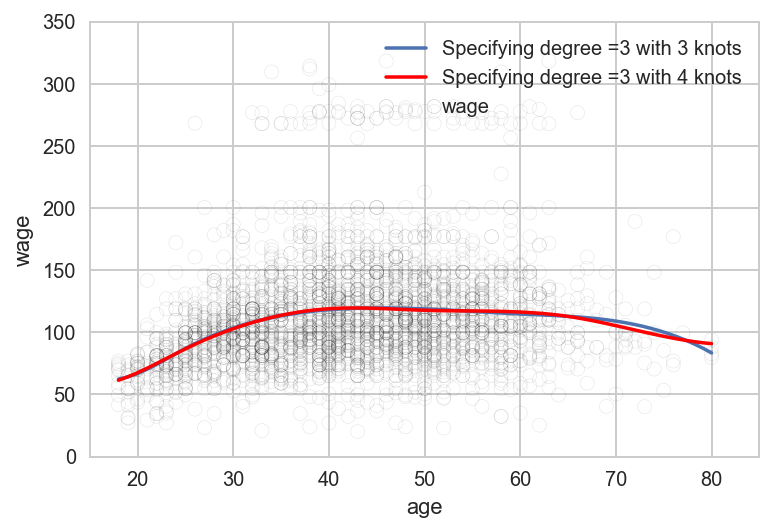

In [45]:
# Plot the splines and error bands
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

We know that the behavior of polynomials that are fit to the data tends to be erratic near the boundaries. Such variability can be dangerous. These problems are resembled by splines, too. The polynomials fit beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. **To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as Natural Spline**.

A natural cubic spline adds additional constraints, namely that the function is linear beyond the boundary knots. This constrains the cubic and quadratic parts there to 0, each reducing the degrees of freedom by 2. That's 2 degrees of freedom at each of the two ends of the curve, reducing K+4 to K.

In [46]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')
fit3 = sm.GLM(y_train, transformed_x3).fit()

In [47]:
# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": X_valid}, return_type='dataframe'))

In [48]:
# Calculating RMSE value
RMSE = sqrt(mean_squared_error(y_valid, pred3))
print(RMSE)

39.36331104785353


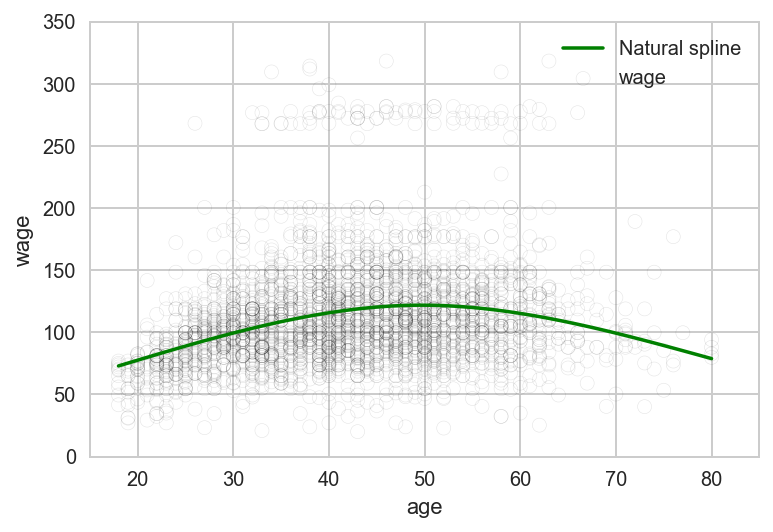

In [49]:
# We will plot the graph for 70 observations only
xp = np.linspace(X_valid.min(),X_valid.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

### Choosing the Number and Locations of the Knots

When we fit a spline, where should we place the knots? One potential place would be the area of high variability, because in those regions the polynomial coefficients can change rapidly. Hence, one option is to place more knots in places where we feel the function might vary most rapidly, and to place fewer knots where it seems more stable.

While this option can work well, in practice it is common to place knots in a uniform fashion. One way to do this is to specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.

Another option is to try out different numbers of knots and see which produces the best looking curve.

**A more objective approach is to use cross-validation. With this method:**

+ we remove a portion of the data,
+ fit a spline with a certain number of knots to the remaining data, and then,
+ use the spline to make predictions for the held-out portion.

We repeat this process multiple times until each observation has been left out once, and then compute the overall cross-validated RMSE. This procedure can be repeated for different numbers of K knots. Then the value of K giving the smallest RMSE is chosen.

### Comparison of Regression Splines with Polynomial Regression

Regression splines often give better results than polynomial regression. This is because, **unlike polynomials, which must use a high degree polynomial to produce flexible fits, splines introduce flexibility by increasing the number of knots but keep the degree fixed**.

Generally, this approach produces more stable estimates. Splines also allow us to place more knots, and hence flexibility, over regions where the function seems to be changing rapidly, and fewer knots where the function appears more stable. The extra flexibility in the polynomial produces undesirable results at the boundaries, whereas the natural cubic spline still provides a reasonable fit to the data.

![](assets/compare.png)